# Tutorial 1 - Plane Fitting and inverse power iteration


- <span style="color:red">imports</span>

In [1]:
import numpy as np #for algebra
import matplotlib.pyplot as plt # for plotting
import os #for reading files and paths
# for interactive graphs
%matplotlib widget 
from ipywidgets import interactive # for figures with user interfaces code 
import matplotlib.cm as cm # for colorbar


## Plane Fitting <a class="anchor" id="first-bullet"></a>

## create and plot a plane

In [12]:
a = -1
b = 1
c = 3
def plane_f(a,b,c,x,y):
    ....
    return z

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = ...



# calculate normal and visualize

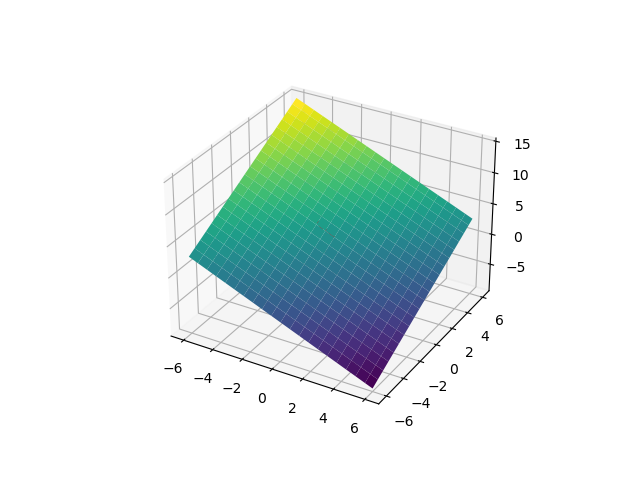

In [18]:
N = np.array([...])
# normalize - this is the true normal
N_GT = N/np.linalg.norm(N)

plt.figure()
ax = plt.axes(projection='3d')

my_cmap = plt.get_cmap('viridis')
ax.plot_surface(..., rstride=5, cstride=5,
                cmap=my_cmap, edgecolor='none')


#plot normal in the middle of the plane
xcent = ...
ycent = ...
zcent = ...
ax.quiver(...,color ='r')
plt.show()

# create random samples, plot next to the plane

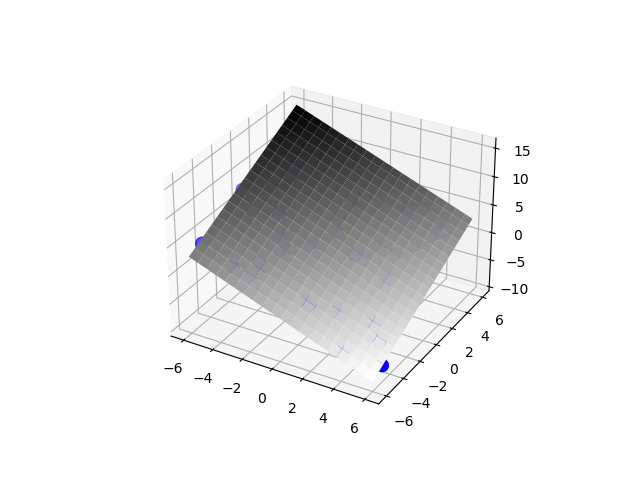

In [38]:
npoints = 40
xsample = (np.random.rand(npoints)-0.5)*12
ysample = (np.random.rand(npoints)-0.5)*12

zsample = # z on the plane
bnoise = True # flag to activate the noise
noise_magnitude = 0.1*(zsample.max()-zsample.min())
if bnoise:
    zsample+= # add noise

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface ...
# plot samples
ax.scatter(... , s=80,c = 'b')
plt.show()

# calculate the points covariance matrix (centered!)

In [39]:
# create a matrix 3 X num points of the coordinates of the samples
P = np.concatenate((xsample[np.newaxis,:],...),axis=0)

# calculate the center point and centralize the points

# create covariance matrix (for finding the smallest eigenvalue later)
A = ...
A.shape

(3, 3)

# calculate the smallest eigenvector
- np.linalg.eig,  np.argmin

In [ ]:
# estimate the normal 
n_est = ...

# calculate free coefficient d (<n_est, (x,y,z)>+delta=0) and plot estimated and original planes

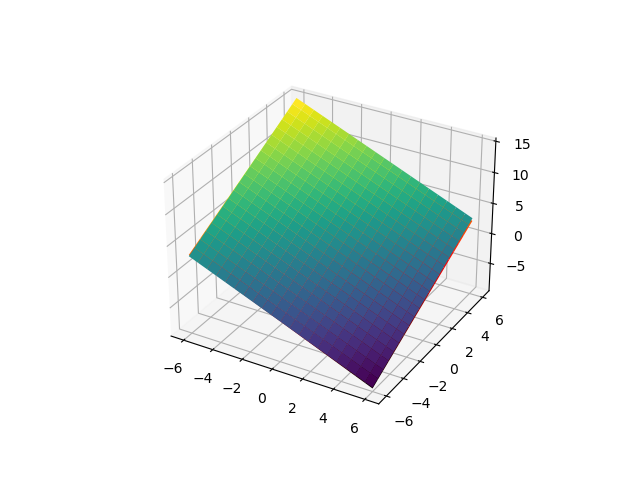

In [41]:
d_est = #.. calculate by plane equation, use center point 


x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)

#original surface
Zorig = ...

# <n_est,(x,y,z)>+d=0 -> z= a_est*x+b_est*y+c_est
#estimated surface
a_est = 
b_est = 
c_est = 
Zest = plane_f(a_est,b_est,c_est, X,Y)

plt.figure()
ax = plt.axes(projection='3d')

my_cmap = plt.get_cmap('viridis')
# plot original surface
...


my_cmap = plt.get_cmap('hot')
#plot estimated surface
...



# calculate normal angle error
- use np.arccos, np.dot

In [ ]:
# print normals - original and estimated
# calculate error

## Power Iteration <a class="anchor" id="secondt-bullet"></a>

http://www.math.pitt.edu/~sussmanm/2071Spring09/lab08/index.html


- <span style="color:red">input examples</span>

In [2]:
M1 =  np.array([[0, 2], 
              [2, 3]])

M2 =  np.array([[1, 0, 0], 
                [0, 3, 0],
                [0, 0, 5]])


- <span style="color:green">complete helper methods</span>

In [16]:
def raileigh_q(A,v):
    r = ...
    return r

def normalize_v(v, method='l2'):
    v_normalized = ...
    return v_normalized

- <span style="color:green">complete power iteration loop</span>

In [17]:
#inputs:
# A - matrix
# x_init - initial solution for eigenvector
# max_iter - maximal iterations for running
# thresh - for convergence of eigenvalue : algorithm converged if np.abs(lambda_prev-lambda_1)<thresh

#outputs:
# v, lambda_1 - eigenvector corresponding to the largest eigenvalue by magnitude and the eigenvalue
# if algorithm converged - print the number of iterations
def power_method(A, x_init, max_iter = 200, thresh=1e-7):  

    iter = 0

    v = x_init.copy()
    lambda_1 = raileigh_q(A,v)

    while True:
        
        lambda_prev = lambda_1

        v_tmp = A@v # update eigenvector estimation according to pwoer iteration
        v = v_tmp.copy()
        v = normalize_v(v, method='l2')

        #make largest element positive for convergence
        i = np.argmax(np.abs(v))
        if v[i]<0:
            v*=-1 

        lambda_1 = raileigh_q(A,v) # estimate eigenvalue
        # print(lambda_1)


        #stopping creitrion - use number of iterations and 
        if ...:
            break
        iter += ... # update iteration counter


    #print if the algorithm converged when we finish the loop above
    if np.abs(lambda_prev-lambda_1)<thresh:
        print('converged')
        print(f'iter {iter}')
    else:
        print('didnt converge') 
        
           
    return v, lambda_1
    
    
    


# inverse power method  (old_v = A @ new_v) 

<span style="color:green"> follow the guidelines:</span>
- calcualte reference solution1: np.linalg.eig
- calcualte reference solution2: use power iteration with np.linalg.inv() 
- inverse power method : use  np.solve(a,b) for finding new_v in your implementation of inverse_power_method 


In [ ]:
#inputs:
# A - matrix
# x_init - initial solution for eigenvector
# max_iter - maximal iterations for running
# thresh - for convergence of eigenvalue : algorithm converged if np.abs(lambda_prev-lambda_1)<thresh

#outputs:
# v, lambda_small - eigenvector corresponding to the smallest eigenvalue by magnitude and the eigenvalue
# if algorithm converged - print the number of iterations
def inverse_power_method(A, x_init, max_iter = 200, thresh=0.01):


    return v, lambda_small